In [55]:
#Import Modules
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec
%matplotlib inline

## 1. Niño 3.4 index
1.1  Compute monthly climatology for SST from Niño 3.4 region, and subtract climatology from SST time series to obtain anomalies.

In [3]:
#Open the netCDF4 file "NOAA_NCDC_ERSST_v3b_SST.nc"
ds = xr.open_dataset("NOAA_NCDC_ERSST_v3b_SST.nc", engine="netcdf4")

#Check the data
ds

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 684)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL
    source:       https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/...
    history:      extracted and cleaned by Ryan Abernathey for Research Compu...

In [4]:
# 计算SST anomalies(海表温度异常)，下文用sst_anom表示

#Group data by month
group_data = ds.sst.sel(lat=slice(-5,5),lon=slice(120,170)).groupby('time.month')

#Monthly climatology for sst就是对grouped data求均值，下式可求Niño 3.4区域(5N-5S, 120W-170W)1960-2016年的sst_anom
sst_anom = group_data - group_data.mean(dim='time')

#Check the data
sst_anom.data

array([[[-0.4533596 , -0.43008804, -0.3652172 , ..., -0.5904255 ,
         -0.51613617, -0.5157356 ],
        [-0.14541245, -0.14106178, -0.20046997, ..., -0.60107803,
         -0.5806999 , -0.5200424 ],
        [ 0.03437614, -0.01860619, -0.1291542 , ..., -0.61279106,
         -0.5868416 , -0.55138206],
        [-0.03416824, -0.07881355, -0.139431  , ..., -0.5768242 ,
         -0.56368065, -0.5451031 ],
        [-0.11306   , -0.14630127, -0.18651962, ..., -0.47527504,
         -0.48386002, -0.49680328]],

       [[-0.6212349 , -0.5504303 , -0.48267746, ..., -0.68665695,
         -0.6161804 , -0.6163101 ],
        [-0.34970474, -0.29545593, -0.3325386 , ..., -0.77547646,
         -0.7685814 , -0.7126312 ],
        [-0.17095375, -0.17284012, -0.23443985, ..., -0.8361454 ,
         -0.82535934, -0.8006687 ],
        [-0.24916267, -0.223135  , -0.2143879 , ..., -0.7794876 ,
         -0.78274345, -0.779541  ],
        [-0.34809303, -0.3074398 , -0.268713  , ..., -0.58963966,
         -0.61

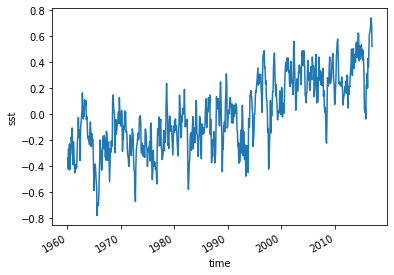

In [5]:
# Niño 3.4 index指的是Niño 3.4区域内的sst_anom 的平均值

#求权重
weights = np.cos(np.deg2rad(sst_anom.lat))

# Compute and plot the correct global monthly SST
sst_anom_weighted = sst_anom.weighted(weights)

#求Niño 3.4区域的sst_anom的平均
Niño34_index = sst_anom_weighted.mean(dim=('lon', 'lat'))
Niño34_index.plot()

In [12]:
# Niño 3.4 index三个月的滑动平均值
moving_average = Niño34_index.rolling(time=3, center=True).mean()
moving_average

<xarray.DataArray 'sst' (time: 684)>
array([            nan, -3.39629382e-01, -3.70039046e-01, -3.07281375e-01,
       -3.59831870e-01, -3.24008286e-01, -3.48886222e-01, -2.65228927e-01,
       -2.27650583e-01, -1.61947235e-01, -2.07212806e-01, -2.67421544e-01,
       -3.02881569e-01, -2.94765949e-01, -2.97090471e-01, -3.76812637e-01,
       -4.16539669e-01, -4.25191700e-01, -4.02766824e-01, -4.04984474e-01,
       -3.74369681e-01, -3.14208061e-01, -2.31692851e-01, -1.30137399e-01,
       -1.22201025e-01, -1.14814043e-01, -1.46631539e-01, -2.05449522e-01,
       -1.93668485e-01, -1.75296783e-01, -6.30158037e-02, -2.21221372e-02,
        5.44784367e-02,  7.98912719e-02,  6.22974448e-02,  1.31134493e-02,
       -1.15028229e-02,  3.76764834e-02,  6.58930093e-02,  9.44813788e-02,
        9.22405943e-02,  4.46712077e-02,  1.60429440e-02, -4.63463329e-02,
       -9.53586102e-02, -1.46520779e-01, -1.83471531e-01, -1.90301895e-01,
       -2.11188123e-01, -1.86645195e-01, -1.37207538e-01, -1.05436489e-01,
       -1.48715377e-01, -1.78014755e-01, -2.10925251e-01, -1.90963119e-01,
       -2.19606802e-01, -2.68648088e-01, -4.01091576e-01, -4.77114528e-01,
       -4.83710617e-01, -4.15731519e-01, -4.13068712e-01, -4.50338572e-01,
       -5.07229686e-01, -6.15712345e-01, -6.75394654e-01, -7.17694759e-01,
       -6.91900432e-01, -6.64161086e-01, -5.91678917e-01, -4.65221375e-01,
       -3.27717125e-01, -2.59882033e-01, -2.46732056e-01, -3.23978484e-01,
       -3.78760338e-01, -3.86054039e-01, -3.17827642e-01, -2.32902706e-01,
...
        3.30965817e-01,  2.59857476e-01,  2.36845881e-01,  2.39445686e-01,
        2.34940290e-01,  2.31495470e-01,  2.46801317e-01,  2.39709795e-01,
        2.28880852e-01,  1.57152653e-01,  1.25055522e-01,  1.11480147e-01,
        1.39061674e-01,  1.69617414e-01,  1.85678899e-01,  2.18326181e-01,
        2.03062937e-01,  1.93001568e-01,  2.09460586e-01,  2.52123654e-01,
        2.14773238e-01,  1.74542189e-01,  1.27193391e-01,  1.83839053e-01,
        1.93022877e-01,  2.40376517e-01,  2.78330564e-01,  3.40011477e-01,
        4.09146965e-01,  4.06808615e-01,  3.74895185e-01,  3.32175463e-01,
        3.92753482e-01,  4.42643762e-01,  4.35877413e-01,  4.20361698e-01,
        4.07472849e-01,  4.23509121e-01,  4.47395504e-01,  4.96035665e-01,
        5.16210437e-01,  4.83601272e-01,  4.79050398e-01,  5.33603191e-01,
        5.94619274e-01,  5.50879776e-01,  5.17057061e-01,  4.75430727e-01,
        4.80392992e-01,  4.55656767e-01,  4.70045447e-01,  4.86547083e-01,
        5.02133489e-01,  4.62691963e-01,  4.69100773e-01,  4.39872354e-01,
        3.95797104e-01,  2.43148968e-01,  1.12180494e-01,  3.59635428e-02,
        1.21478764e-02,  8.03241059e-02,  1.40040785e-01,  2.57511109e-01,
        2.50819325e-01,  3.15177143e-01,  3.31468105e-01,  4.27978605e-01,
        4.91337061e-01,  5.77957392e-01,  6.34547710e-01,  6.57322645e-01,
        6.96148634e-01,  7.07467556e-01,  6.52337432e-01,             nan],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

In [71]:
x1 = Niño34_index.time
x1

<xarray.DataArray 'time' (time: 684)>
array(['1960-01-15T00:00:00.000000000', '1960-02-15T00:00:00.000000000',
       '1960-03-15T00:00:00.000000000', ..., '2016-10-15T00:00:00.000000000',
       '2016-11-15T00:00:00.000000000', '2016-12-15T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 ... 2016-12-15
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

(-1, 1)

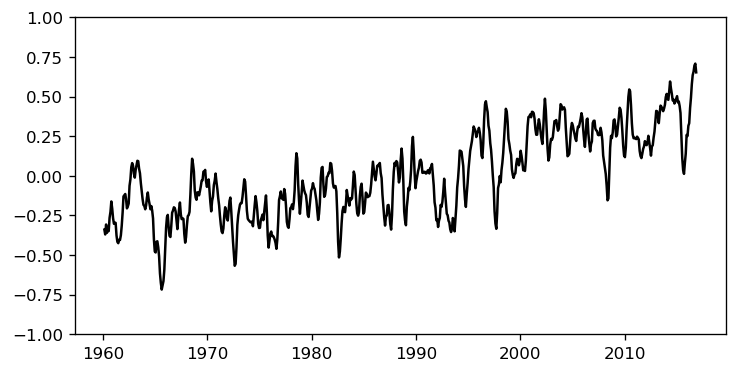

In [72]:
#绘图
fig, ax1 = plt.subplots(figsize=(7,3.5),sharey=False, dpi=120)
# x1 = Niño34_index.time
ax1.plot(x1,moving_average.data,color='k')
ax1.set_ylim(-1, 1)

ax2 = ax1.twinx() 
ax2.set_ylim(-1, 1)
ax2.plot(Niño34_index.time,Niño34_index.data,color='r')